In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
India_covid19 = pd.read_csv('covid_19_india.csv')
India_covid19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
India_covid19.drop(["Sno"], axis = 1, inplace = True)
India_covid19.rename(columns = {"State/UnionTerritiry": "States"}, inplace=True)
India_covid19.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
India_per_day = India_covid19.groupby(["Date"])["Confirmed"].sum().reset_index().sort_values("Date", ascending = True)
India_per_day.head()

,Date,Confirmed
0,01/02/20,2
1,01/03/20,3
2,01/04/20,1834
3,02/02/20,3
4,02/03/20,5


In [5]:
India_per_day['Date']=pd.to_datetime(India_per_day.Date,dayfirst=True)
India_daily= India_per_day.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending=True)
India_daily["day_count"] = np.arange(0, India_daily.shape[0])

daily_infection = India_daily.loc[:, ["day_count", "Confirmed"]]
daily_infection.head()

,day_count,Confirmed
0,0,1
1,1,1
2,2,2
3,3,3
4,4,3


Apply log transformation to the number of infections¶


In [6]:
daily_infection['logInfections'] = np.log(daily_infection.Confirmed)
daily_infection.head(10)

,day_count,Confirmed,logInfections
0,0,1,0.000000
1,1,1,0.000000
2,2,2,0.693147
3,3,3,1.098612
4,4,3,1.098612
5,5,3,1.098612
6,6,3,1.098612
7,7,3,1.098612
8,8,3,1.098612
9,9,3,1.098612


Statsmodels Linear Regression¶


In [7]:
X = daily_infection.day_count
X = sm.add_constant(X)

c:\users\sumukh\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
y = daily_infection.logInfections


In [9]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     547.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.27e-33
Time:                        10:43:07   Log-Likelihood:                -81.007
No. Observations:                  67   AIC:                             166.0
Df Residuals:                      65   BIC:                             170.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7461      0.199     -3.752      0.0

In [10]:
np.exp(-0.7461)

0.47421237931894705

In [11]:
np.exp(0.1217)

1.1294152263836357

In [12]:
def linear_predictions(t):
    return np.exp(-0.7461) * np.exp(0.1217) ** t

In [13]:
daily_infection['Predictions'] = daily_infection.day_count.apply(linear_predictions)
daily_infection.head(10)

,day_count,Confirmed,logInfections,Predictions
0,0,1,0.000000,0.474212
1,1,1,0.000000,0.535583
2,2,2,0.693147,0.604895
3,3,3,1.098612,0.683178
4,4,3,1.098612,0.771592
5,5,3,1.098612,0.871447
6,6,3,1.098612,0.984226
7,7,3,1.098612,1.111600
8,8,3,1.098612,1.255457
9,9,3,1.098612,1.417933


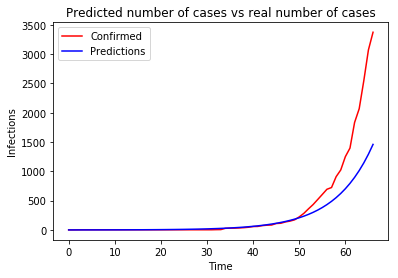

In [14]:
plt.plot(daily_infection.day_count, daily_infection.Confirmed, 'red')
plt.plot(daily_infection.day_count, daily_infection.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Time')
plt.ylabel('Infections')
plt.legend()

In [15]:
a = np.exp(-0.7461)
b = np.exp(0.1217)

In [23]:
def prediction(day):
    
    d = b**day
    c = a*d
    return(c)
    

In [24]:
prediction(80)

8021.654689772988